In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
train_data[:5]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [5]:
train_labels[:5]

array([3, 4, 3, 4, 4])

In [6]:
len(pd.Series(train_labels).unique())

46

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)

In [11]:
x_train[:1]

array([[0., 1., 1., ..., 0., 0., 0.]])

In [12]:
x_test = vectorize_sequences(test_data)

In [13]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
one_hot_train_labels[:1]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [15]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [18]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 4s 132ms/step - loss: 0.3890 - accuracy: 0.1591 - val_loss: 0.1714 - val_accuracy: 0.3530
Epoch 2/20
16/16 [==============================] - 1s 86ms/step - loss: 0.1249 - accuracy: 0.3643 - val_loss: 0.0967 - val_accuracy: 0.3590
Epoch 3/20
16/16 [==============================] - 1s 92ms/step - loss: 0.0812 - accuracy: 0.4450 - val_loss: 0.0715 - val_accuracy: 0.5430
Epoch 4/20
16/16 [==============================] - 1s 91ms/step - loss: 0.0615 - accuracy: 0.6125 - val_loss: 0.0567 - val_accuracy: 0.6340
Epoch 5/20
16/16 [==============================] - 1s 80ms/step - loss: 0.0490 - accuracy: 0.6916 - val_loss: 0.0476 - val_accuracy: 0.6710
Epoch 6/20
16/16 [==============================] - 2s 100ms/step - loss: 0.0404 - accuracy: 0.7271 - val_loss: 0.0414 - val_accuracy: 0.7230
Epoch 7/20
16/16 [==============================] - 1s 92ms/step - loss: 0.0342 - accuracy: 0.7744 - val_loss: 0.0376 - val_accuracy: 0.7390
Epoch 8/20


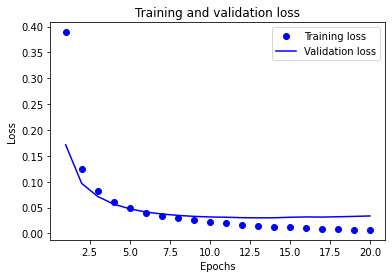

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

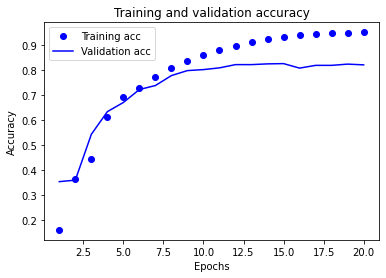

In [23]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [25]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [26]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 2s 100ms/step - loss: 3.2896 - accuracy: 0.4357 - val_loss: 2.5168 - val_accuracy: 0.5710
Epoch 2/9
16/16 [==============================] - 1s 78ms/step - loss: 1.9576 - accuracy: 0.6145 - val_loss: 1.5967 - val_accuracy: 0.6470
Epoch 3/9
16/16 [==============================] - 1s 74ms/step - loss: 1.3175 - accuracy: 0.7236 - val_loss: 1.2689 - val_accuracy: 0.7220
Epoch 4/9
16/16 [==============================] - 1s 72ms/step - loss: 1.0091 - accuracy: 0.7875 - val_loss: 1.1256 - val_accuracy: 0.7630
Epoch 5/9
16/16 [==============================] - 1s 79ms/step - loss: 0.8027 - accuracy: 0.8309 - val_loss: 1.0338 - val_accuracy: 0.7890
Epoch 6/9
16/16 [==============================] - 1s 73ms/step - loss: 0.6367 - accuracy: 0.8658 - val_loss: 0.9813 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 1s 74ms/step - loss: 0.5014 - accuracy: 0.8951 - val_loss: 0.9438 - val_accuracy: 0.8130
Epoch 8/9
16/16 [==

In [27]:
result = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 0.9720 - accuracy: 0.7890
